## Những yếu tố ảnh hưởng tới thành tích của đội bóng tại Châu Âu

**Database:** https://www.kaggle.com/datasets/hugomathien/soccer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('drive/MyDrive/Colab Notebooks/PTDLTQ')

In [ ]:
#   Importing the necessary libraries/modules.

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#   Ignoring any FutureWarning messages.

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
connection=sqlite3.connect("database.sqlite")   #   Establishing a connection with the database.
cursor=connection.cursor()  #   Creating a cursor object to execute queries.

In [ ]:
dataframe=pd.read_sql_query('''SELECT * FROM Match
                                LIMIT 10;''', connection)
dataframe

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,GBH,GBD,GBA,BSH,BSD,BSA,Leagues,Countries,Home_Team,Away_Team
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1.78,3.25,4.00,1.73,3.40,4.20,Belgium Jupiler League,Belgium,KRC Genk,Beerschot AC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,1.85,3.25,3.75,1.91,3.25,3.60,Belgium Jupiler League,Belgium,SV Zulte-Waregem,Sporting Lokeren
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,3.20,2.50,2.30,3.20,2.75,Belgium Jupiler League,Belgium,KSV Cercle Brugge,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,1.50,3.75,5.50,1.44,3.75,6.50,Belgium Jupiler League,Belgium,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,4.50,3.50,1.65,4.75,3.30,1.67,Belgium Jupiler League,Belgium,FCV Dender EH,Standard de Liège
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,4.50,3.40,1.70,NaN,NaN,NaN,Belgium Jupiler League,Belgium,KV Mechelen,Club Brugge KV
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,1.85,3.25,3.75,2.10,3.25,3.10,Belgium Jupiler League,Belgium,KSV Roeselare,KV Kortrijk
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.80,3.20,2.25,2.88,3.25,2.20,Belgium Jupiler League,Belgium,Tubize,Royal Excel Mouscron
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,2.20,3.30,2.80,2.25,3.20,2.80,Belgium Jupiler League,Belgium,KVC Westerlo,Sporting Charleroi
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,1.25,5.00,10.00,1.29,4.50,9.00,Belgium Jupiler League,Belgium,Club Brugge KV,KV Kortrijk


In [ ]:
#   Extracting the distinct values of the columns containing the names corresponding to the tables.

countries=cursor.execute('''SELECT COUNT(DISTINCT name)
                                FROM League;''').fetchall()
leagues=cursor.execute('''SELECT COUNT(DISTINCT name)
                            FROM League;''').fetchall()
teams=cursor.execute('''SELECT COUNT(DISTINCT team_long_name)
                            FROM Team;''').fetchall()
players=cursor.execute('''SELECT COUNT(DISTINCT player_name)
                            FROM Player;''').fetchall()

#   Printing the count of each table.

print("Countries: ", countries[0][0])
print("Leagues: ", leagues[0][0])
print("Teams: ", teams[0][0])
print("Players: ", players[0][0])

Countries:  11
Leagues:  11
Teams:  296
Players:  10848


In [ ]:
cursor.execute("END TRANSACTION;")    #   Beginning a transaction to improve the execution time of the queries.


In [ ]:
cursor.execute("BEGIN TRANSACTION;")    #   Beginning a transaction to improve the execution time of the queries.

#   Creating corresponding columns in the table to store the names of the leagues and countries.

cursor.execute('''ALTER TABLE Match
                    ADD COLUMN "Leagues" TEXT;''')
cursor.execute('''ALTER TABLE Match
                    ADD COLUMN "Countries" TEXT;''')
cursor.execute('''ALTER TABLE Match
                    ADD COLUMN "Home_Team" TEXT;''')
cursor.execute('''ALTER TABLE Match
                    ADD COLUMN "Away_Team" TEXT;''')

#   Updating the corresponding columns with the names of the leagues and countries after joining the tables.

cursor.execute('''UPDATE Match
                    SET Leagues=(
                        SELECT League.name
                        FROM League
                        WHERE Match.league_id=League.id),
                    Countries=(
                        SELECT Country.name
                        FROM Country
                        WHERE Match.country_id=Country.id),
                    Home_Team=(
                        SELECT Team.team_long_name
                        FROM Team
                        WHERE Match.home_team_api_id=Team.team_api_id),
                    Away_Team=(
                        SELECT Team.team_long_name
                        FROM Team
                        WHERE Match.away_team_api_id=Team.team_api_id)
                    WHERE league_id IN (
                        SELECT id
                        FROM League)
                    AND country_id IS NOT NULL
                    AND home_team_api_id IN (
                        SELECT team_api_id
                        FROM Team)
                    AND away_team_api_id IN (
                        SELECT team_api_id
                        FROM Team);''')

cursor.execute("END TRANSACTION;")  #   Ending the transaction.

In [ ]:
dataframe=pd.read_sql_query('''SELECT *
                                FROM Match
                                    LIMIT 10;''', connection)
dataframe

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,GBH,GBD,GBA,BSH,BSD,BSA,Leagues,Countries,Home_Team,Away_Team
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1.78,3.25,4.00,1.73,3.40,4.20,Belgium Jupiler League,Belgium,KRC Genk,Beerschot AC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,1.85,3.25,3.75,1.91,3.25,3.60,Belgium Jupiler League,Belgium,SV Zulte-Waregem,Sporting Lokeren
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,3.20,2.50,2.30,3.20,2.75,Belgium Jupiler League,Belgium,KSV Cercle Brugge,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,1.50,3.75,5.50,1.44,3.75,6.50,Belgium Jupiler League,Belgium,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,4.50,3.50,1.65,4.75,3.30,1.67,Belgium Jupiler League,Belgium,FCV Dender EH,Standard de Liège
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,4.50,3.40,1.70,NaN,NaN,NaN,Belgium Jupiler League,Belgium,KV Mechelen,Club Brugge KV
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,1.85,3.25,3.75,2.10,3.25,3.10,Belgium Jupiler League,Belgium,KSV Roeselare,KV Kortrijk
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.80,3.20,2.25,2.88,3.25,2.20,Belgium Jupiler League,Belgium,Tubize,Royal Excel Mouscron
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,2.20,3.30,2.80,2.25,3.20,2.80,Belgium Jupiler League,Belgium,KVC Westerlo,Sporting Charleroi
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,1.25,5.00,10.00,1.29,4.50,9.00,Belgium Jupiler League,Belgium,Club Brugge KV,KV Kortrijk


In [ ]:
dataframe1=pd.read_sql_query('''SELECT *
                                FROM Match
                                    ;''', connection)
dataframe1

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,GBH,GBD,GBA,BSH,BSD,BSA,Leagues,Countries,Home_Team,Away_Team
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1.78,3.25,4.00,1.73,3.40,4.20,Belgium Jupiler League,Belgium,KRC Genk,Beerschot AC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,1.85,3.25,3.75,1.91,3.25,3.60,Belgium Jupiler League,Belgium,SV Zulte-Waregem,Sporting Lokeren
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,3.20,2.50,2.30,3.20,2.75,Belgium Jupiler League,Belgium,KSV Cercle Brugge,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,1.50,3.75,5.50,1.44,3.75,6.50,Belgium Jupiler League,Belgium,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,4.50,3.50,1.65,4.75,3.30,1.67,Belgium Jupiler League,Belgium,FCV Dender EH,Standard de Liège
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland Super League,Switzerland,FC St. Gallen,FC Thun
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland Super League,Switzerland,FC Vaduz,FC Luzern
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland Super League,Switzerland,Grasshopper Club Zürich,FC Sion
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland Super League,Switzerland,Lugano,FC Zürich


In [ ]:
home_team_wins = dataframe1[dataframe1['home_team_goal'] > dataframe1['away_team_goal']] 
away_team_wins = dataframe1[dataframe1['home_team_goal'] < dataframe1['away_team_goal']] 
draws = dataframe1[dataframe1['home_team_goal'] == dataframe1['away_team_goal']] 

In [ ]:
len(home_team_wins)

11917

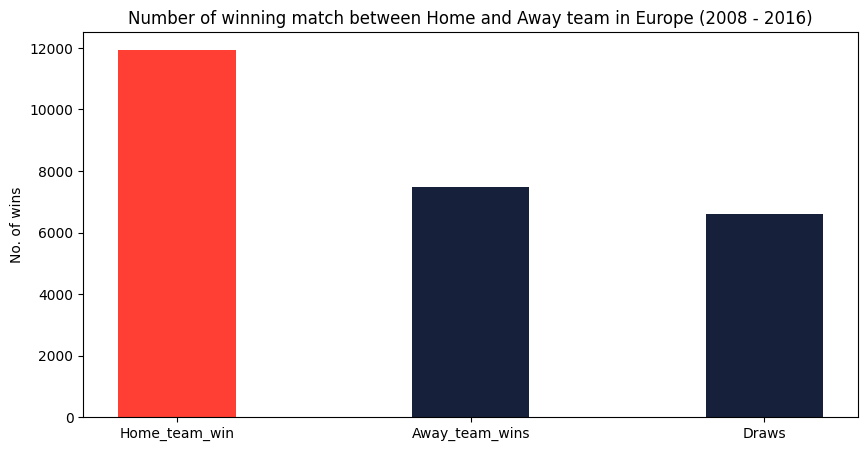

In [ ]:
fig = plt.figure(figsize = (10, 5))
keys = ['Home_team_win', 'Away_team_wins', 'Draws']
values = [len(home_team_wins), len(away_team_wins), len(draws)]
# creating the bar plot
plt.bar(keys, values, color ='#17203b',
        width = 0.4)
plt.bar(keys[0], values[0], color="#ff3f34", width = 0.4)
plt.xlabel("")
plt.ylabel("No. of wins")
plt.title("Number of winning match between Home and Away team in Europe (2008 - 2016)")
plt.show()

In [ ]:
dataframe=pd.read_sql_query('''SELECT Home_Team AS "Team",
                                season AS "Season",
                                Leagues AS "League",
                                COUNT(*) AS "Matches_Played",
                                SUM(home_team_goal) AS "Goals_Scored",
                                SUM(away_team_goal) AS "Goals_Conceded",
                                SUM(
                                    CASE WHEN home_team_goal>away_team_goal
                                    THEN 1
                                    ELSE 0
                                    END) AS "Wins",
                                SUM(
                                        CASE WHEN home_team_goal=away_team_goal
                                        THEN 1
                                        ELSE 0
                                        END) AS "Draws",
                                SUM(
                                        CASE WHEN home_team_goal<away_team_goal
                                        THEN 1
                                        ELSE 0
                                        END) AS "Losses",
                                SUM(
                                        CASE WHEN home_team_goal>away_team_goal
                                        THEN 1
                                        ELSE 0
                                        END)*100/COUNT(*) AS "Win_Percentage"
                                FROM Match
                                GROUP BY Team, season, Leagues
                                UNION
                                SELECT Away_Team AS "Team",
                                season AS "Season",
                                Leagues AS "League",
                                COUNT(*) AS "Matches_Played",
                                SUM(away_team_goal) AS "Goals_Scored",
                                SUM(home_team_goal) AS "Goals_Conceded",
                                SUM(
                                        CASE WHEN away_team_goal>home_team_goal
                                        THEN 1
                                        ELSE 0
                                        END) AS "Wins",
                                SUM(
                                        CASE WHEN away_team_goal=home_team_goal
                                        THEN 1
                                        ELSE 0
                                        END) AS "Draws",
                                SUM(
                                        CASE WHEN away_team_goal<home_team_goal
                                        THEN 1
                                        ELSE 0
                                        END) AS "Losses",
                                SUM(
                                        CASE WHEN away_team_goal>home_team_goal
                                        THEN 1
                                        ELSE 0
                                        END)*100/COUNT() AS "Win_Percentage"
                                FROM Match
                                GROUP BY Team, season, Leagues
                                ORDER BY Win_Percentage
                                DESC;''', connection)
dataframe

,Team,Season,League,Matches_Played,Goals_Scored,Goals_Conceded,Wins,Draws,Losses,Win_Percentage
0,Juventus,2013/2014,Italy Serie A,19,47,9,19,0,0,100
1,KV Oostende,2013/2014,Belgium Jupiler League,3,4,0,3,0,0,100
2,Ajax,2009/2010,Netherlands Eredivisie,17,64,4,16,1,0,94
3,FC Barcelona,2009/2010,Spain LIGA BBVA,19,57,11,18,1,0,94
4,FC Barcelona,2012/2013,Spain LIGA BBVA,19,63,15,18,1,0,94
...,...,...,...,...,...,...,...,...,...,...
2951,Valenciennes FC,2008/2009,France Ligue 1,19,8,24,0,10,9,0
2952,Waasland-Beveren,2013/2014,Belgium Jupiler League,3,3,6,0,1,2,0
2953,Widzew Łódź,2013/2014,Poland Ekstraklasa,15,8,33,0,1,14,0
2954,Willem II,2010/2011,Netherlands Eredivisie,17,9,50,0,3,14,0


In [ ]:
Real_madrid_results = dataframe[dataframe['Team']=='Real Madrid CF']
Real_madrid_results = Real_madrid_results.groupby(Real_madrid_results['Season']).sum()
Real_madrid_results['Win_Percentage'] = Real_madrid_results['Win_Percentage'] / 2

In [ ]:
Real_madrid_results

,Matches_Played,Goals_Scored,Goals_Conceded,Wins,Draws,Losses,Win_Percentage
Season,,,,,,,
2008/2009,38,83,52,25,3,10,65.0
2009/2010,38,102,35,31,3,4,81.0
2010/2011,38,102,33,29,5,4,76.0
2011/2012,38,121,32,32,4,2,84.0
2012/2013,38,103,42,26,7,5,68.0
2013/2014,38,104,38,27,6,5,70.5
2014/2015,38,118,38,30,2,6,78.5
2015/2016,38,110,34,28,6,4,73.5


Text(0.5, 1.0, 'Changes and improvements in Real Madrid win percentages from 2010 to 2015')

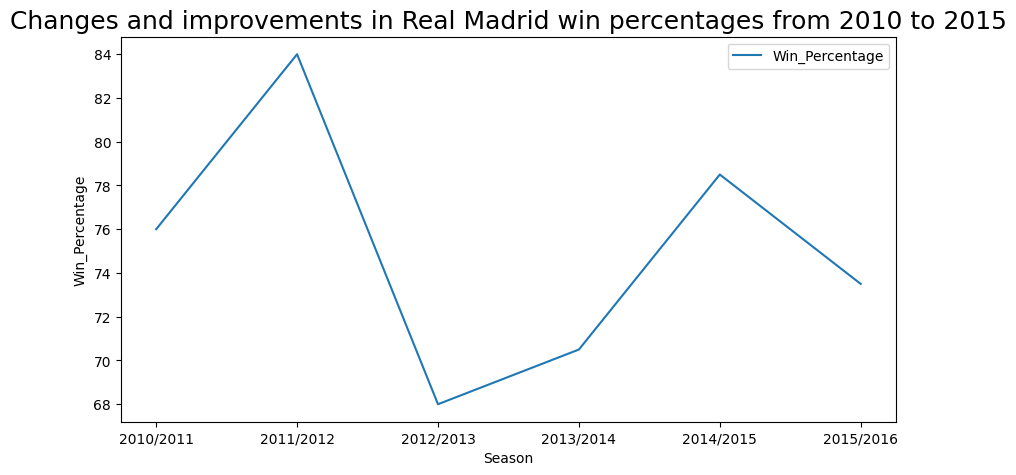

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Season",y="Win_Percentage",data=Real_madrid_results[2:], label="Win_Percentage").set_title("Changes and improvements in Real Madrid win percentages from 2010 to 2015", fontsize=18)

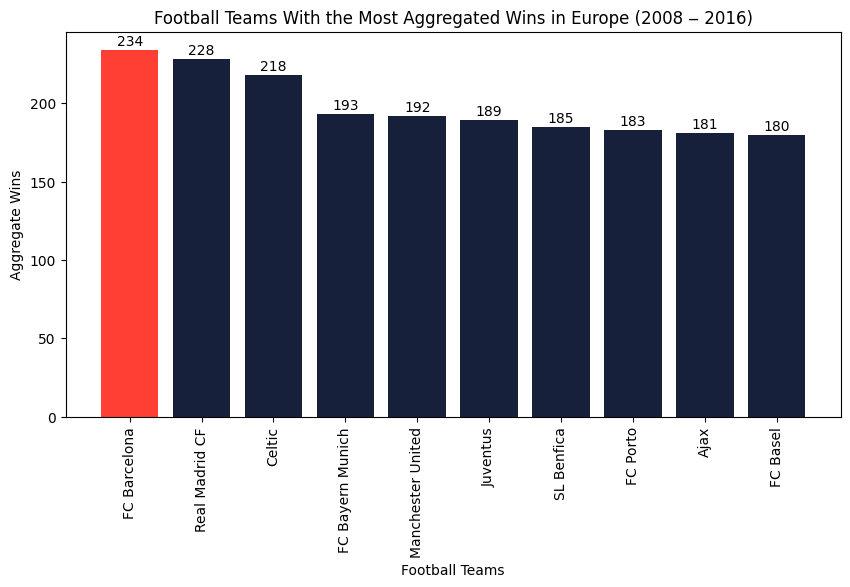

In [ ]:
wins=dataframe.groupby(["Team", "League"])["Wins"].sum().reset_index()  #   Grouping the pandas.DataFrame by team and league, and summing the wins.
wins=wins.sort_values(by="Wins", ascending=False).reset_index(drop=True)    #   Sorting the pandas.DataFrame by the wins in descending order.

#   Plotting a bar graph for the top ten teams with the most wins across all seasons and leagues.

plt.figure(figsize=(10, 5))
plt.bar(wins["Team"][:10], wins["Wins"][:10], color="#17203b")
plt.bar(wins["Team"][0], wins["Wins"][0], color="#ff3f34")
plt.xticks(rotation=90)
plt.xlabel("Football Teams")
plt.ylabel("Aggregate Wins")
plt.title("Football Teams With the Most Aggregated Wins in Europe (2008 ‒ 2016)")
for i in range(10):
    plt.text(x=i, y=wins["Wins"][i]+3, s=wins["Wins"][i], ha="center")
plt.show()

In [ ]:
wins[:20]

,Team,League,Wins
0,FC Barcelona,Spain LIGA BBVA,234
1,Real Madrid CF,Spain LIGA BBVA,228
2,Celtic,Scotland Premier League,218
3,FC Bayern Munich,Germany 1. Bundesliga,193
4,Manchester United,England Premier League,192
5,Juventus,Italy Serie A,189
6,SL Benfica,Portugal Liga ZON Sagres,185
7,FC Porto,Portugal Liga ZON Sagres,183
8,Ajax,Netherlands Eredivisie,181
9,FC Basel,Switzerland Super League,180


In [ ]:
cursor.execute("END TRANSACTION;")

In [ ]:
cursor.execute("BEGIN TRANSACTION;")    #   Beginning a transaction to improve the execution time of the queries.

#   Creating a corresponding column in the table to store the names of the teams.

cursor.execute('''ALTER TABLE Team_Attributes
                    ADD COLUMN "Team" TEXT;''')

#   Updating the corresponding column with the names of the teams after joining the tables.

cursor.execute('''UPDATE Team_Attributes
                    SET Team=(
                        SELECT Team.team_long_name
                        FROM Team
                        WHERE Team_Attributes.team_api_id=Team.team_api_id);''')

cursor.execute("END TRANSACTION;")  #   Ending the transaction.

#   Creating a pandas.DataFrame from the table.



In [ ]:
team_attributes=pd.read_sql_query('''SELECT *
                                        FROM Team_Attributes''', connection)
team_attributes

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,Team
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,Normal,Organised,46,Medium,48,Press,53,Normal,Cover,SV Zulte-Waregem
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,Normal,Organised,44,Medium,55,Press,53,Normal,Cover,SV Zulte-Waregem
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,Little,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,Little,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem


In [ ]:
team_attributes=team_attributes.groupby("Team").mean().reset_index()    #   Grouping the pandas.DataFrame by the teams and taking the mean of the attributes.
goals_scored=dataframe.groupby(["Team", "League"])["Goals_Scored"].sum().reset_index()  #   Grouping the pandas.DataFrame by the teams and leagues, and summing the goals scored.
goals_scored=goals_scored.sort_values(by="Goals_Scored", ascending=False).reset_index(drop=True)    #   Sorting the pandas.DataFrame by the goals scored in descending order.
team_attributes_goals=pd.merge(team_attributes, goals_scored, on="Team")    #   Merging both the pandas.DataFrames on the basis of the teams.
team_attributes_goals=team_attributes_goals.sort_values(by="Goals_Scored", ascending=False) #   Sorting the pandas.DataFrame by the goals scored in descending order.
team_attributes_goals=team_attributes_goals.reset_index(drop=True)
team_attributes_goals=team_attributes_goals.drop(["id", "team_fifa_api_id", "team_api_id", "League"], axis=1)   #   Dropping the unnecessary columns.
team_attributes_goals

,Team,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,Goals_Scored
0,FC Barcelona,35.833333,35.0,34.000000,45.166667,33.333333,53.000000,64.333333,54.500000,66.500000,849
1,Real Madrid CF,50.666667,55.5,38.666667,67.500000,53.833333,69.000000,52.000000,52.166667,63.500000,843
2,Celtic,61.333333,50.5,57.333333,55.666667,60.833333,60.833333,53.333333,54.333333,62.166667,695
3,FC Bayern Munich,48.666667,29.0,35.166667,38.500000,40.666667,49.666667,57.166667,48.833333,55.166667,653
4,PSV,52.333333,39.0,38.333333,50.166667,54.500000,54.000000,43.833333,41.500000,48.833333,652
...,...,...,...,...,...,...,...,...,...,...,...
280,Pescara,59.600000,41.5,50.800000,50.000000,52.000000,46.200000,37.800000,49.000000,44.800000,27
281,SpVgg Greuther Fürth,59.833333,60.0,45.666667,50.666667,51.000000,50.833333,46.666667,52.833333,56.666667,26
282,FC Dordrecht,39.000000,33.0,62.000000,62.000000,66.000000,48.000000,51.000000,58.000000,55.000000,24
283,Córdoba CF,40.333333,46.5,46.333333,41.666667,59.000000,51.166667,36.833333,38.333333,48.666667,22


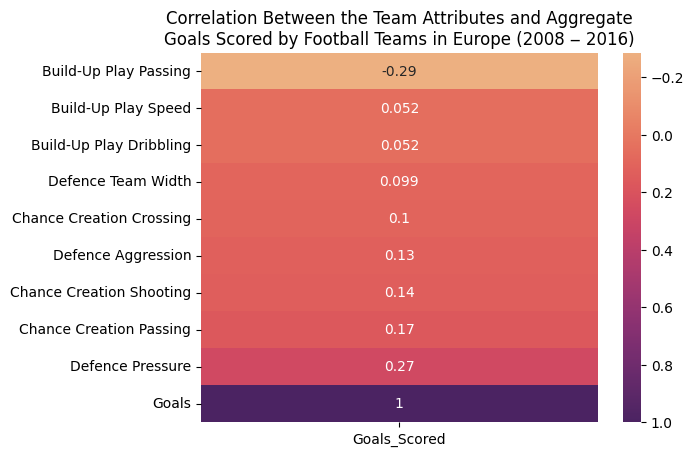

In [ ]:
#   Plotting a heatmap for the correlation between the team attributes and the goals scored by the teams.

sns.heatmap(team_attributes_goals.corr()[["Goals_Scored"]].sort_values(by="Goals_Scored", ascending=True), annot=True, cmap="flare", yticklabels=["Build-Up Play Passing", "Build-Up Play Speed", "Build-Up Play Dribbling", "Defence Team Width", "Chance Creation Crossing", "Defence Aggression", "Chance Creation Shooting", "Chance Creation Passing", "Defence Pressure", "Goals"])
plt.title('''Correlation Between the Team Attributes and Aggregate
Goals Scored by Football Teams in Europe (2008 ‒ 2016)''')
plt.gcf().axes[1].invert_yaxis()
plt.show()

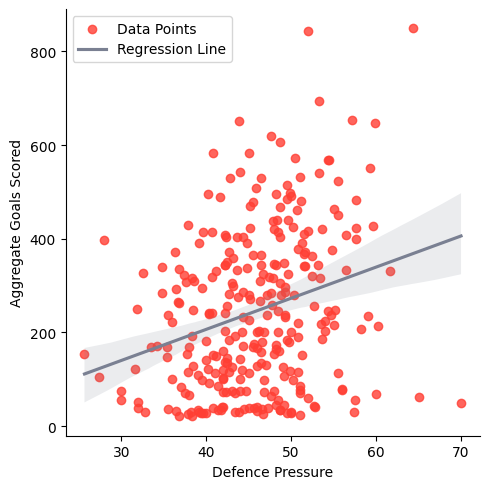

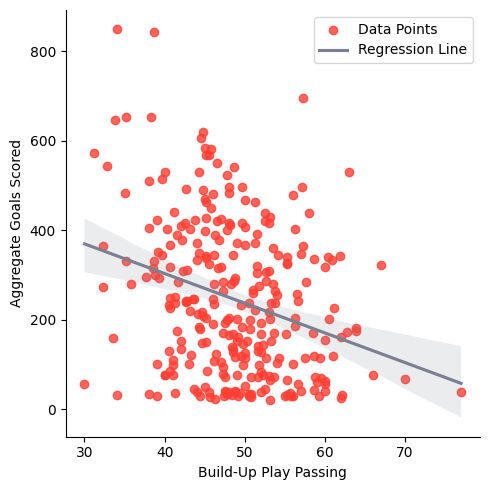

In [ ]:
#   Plotting a scatter plot with the regression line for the correlation between the defence pressure and the aggregated goals scored by the teams.

sns.lmplot(x="defencePressure", y="Goals_Scored", data=team_attributes_goals, scatter_kws={"color": "#ff3f34"}, line_kws={"color": "#7a8092"})
plt.xlabel("Defence Pressure")
plt.ylabel("Aggregate Goals Scored")
plt.legend(["Data Points", "Regression Line"])
plt.show()

#   Plotting a scatter plot with the regression line for the correlation between the build-up play passing and the aggregated goals scored by the teams.

sns.lmplot(x="buildUpPlayPassing", y="Goals_Scored", data=team_attributes_goals, scatter_kws={"color": "#ff3f34"}, line_kws={"color": "#7a8092"})
plt.xlabel("Build-Up Play Passing")
plt.ylabel("Aggregate Goals Scored")
plt.legend(["Data Points", "Regression Line"])
plt.show()

In [ ]:
italy_serie_a=dataframe[dataframe["League"]=="Italy Serie A"].groupby(["Team", "Season"])["Goals_Scored"].sum().reset_index()   #   Grouping the pandas.DataFrame by the teams and seasons in a specific league, and aggregating the goals scored.
italy_serie_a=italy_serie_a.sort_values(by="Goals_Scored", ascending=False).reset_index(drop=True)  #   Sorting the pandas.DataFrame by the aggregated goals scored in descending order.
italy_serie_a_goals=italy_serie_a.groupby("Team")["Goals_Scored"].sum().reset_index()   #   Grouping the pandas.DataFrame by the teams, and aggregating the goals scored.
italy_serie_a_goals=italy_serie_a_goals.sort_values(by="Goals_Scored", ascending=False).reset_index(drop=True)  #   Sorting the pandas.DataFrame by the aggregated goals scored in descending order.
italy_serie_a_goals.head(5)

,Team,Goals_Scored
0,Juventus,543
1,Roma,530
2,Napoli,514
3,Milan,496
4,Inter,496


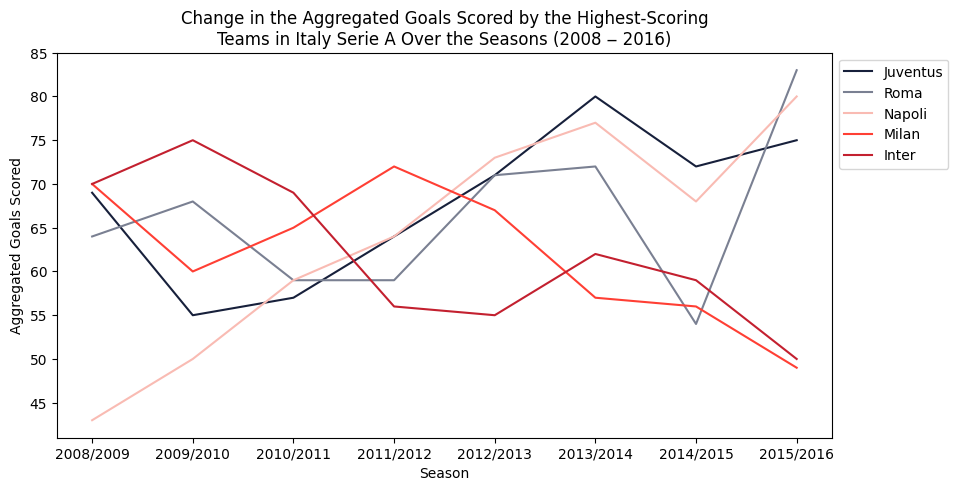

In [ ]:
#   Sorting the pandas.DataFrame according to the season in ascending order for each team, and storing them in separate pandas.DataFrames for each team.

juventus=(italy_serie_a[italy_serie_a["Team"]=="Juventus"]).sort_values(by="Season").reset_index(drop=True)
roma=(italy_serie_a[italy_serie_a["Team"]=="Roma"]).sort_values(by="Season").reset_index(drop=True)
napoli=(italy_serie_a[italy_serie_a["Team"]=="Napoli"]).sort_values(by="Season").reset_index(drop=True)
milan=(italy_serie_a[italy_serie_a["Team"]=="Milan"]).sort_values(by="Season").reset_index(drop=True)
inter=(italy_serie_a[italy_serie_a["Team"]=="Inter"]).sort_values(by="Season").reset_index(drop=True)

#   Plotting a line plot for the change in the aggregated goals scored by the top five highest-scoring teams in Italy Serie A over the seasons.

plt.figure(figsize=(10, 5))
plt.plot(juventus["Season"], juventus["Goals_Scored"], color="#17203b", label="Juventus")
plt.plot(roma["Season"], roma["Goals_Scored"], color="#7a8092", label="Roma")
plt.plot(napoli["Season"], napoli["Goals_Scored"], color="#f9bbb3", label="Napoli")
plt.plot(milan["Season"], milan["Goals_Scored"], color="#ff3f34", label="Milan")
plt.plot(inter["Season"], inter["Goals_Scored"], color="#c3202f", label="Inter")
plt.title('''Change in the Aggregated Goals Scored by the Highest-Scoring
Teams in Italy Serie A Over the Seasons (2008 ‒ 2016)''')
plt.xlabel("Season")
plt.ylabel("Aggregated Goals Scored")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
cursor.execute("BEGIN TRANSACTION;")    #   Beginning a transaction to improve the execution time of the queries.

#   Creating corresponding columns in the table to store the names, heights, and weights of the players.

cursor.execute('''ALTER TABLE Player_Attributes
                    ADD COLUMN "Player" TEXT;''')

cursor.execute('''ALTER TABLE Player_Attributes
                    ADD COLUMN "Height" TEXT;''')

cursor.execute('''ALTER TABLE Player_Attributes
                    ADD COLUMN "Weight" TEXT;''')

#   Updating the corresponding columns with the names, heights, and weights of the players after joining the tables.

cursor.execute('''UPDATE Player_Attributes
                    SET Player=(
                    SELECT Player.player_name
                        FROM Player
                        WHERE Player_Attributes.player_api_id=Player.player_api_id),
                    Height=(
                        SELECT Player.height
                        FROM Player
                        WHERE Player_Attributes.player_api_id=Player.player_api_id),
                    Weight=(
                        SELECT Player.weight
                        FROM Player
                        WHERE Player_Attributes.player_api_id=Player.player_api_id);''')

cursor.execute("END TRANSACTION;")  #   Ending the transaction.

In [ ]:
player_attributes=pd.read_sql_query('''SELECT Player,
                                        Weight,
                                        Height,
                                        AVG(overall_rating) AS "Overall_Rating", 
                                        AVG(potential) AS "Potential", 
                                        AVG(crossing) AS "Crossing", 
                                        AVG(finishing) AS "Finishing",
                                        AVG(heading_accuracy) AS "Head_Accuracy",
                                        AVG(short_passing) AS "Short_Passing",
                                        AVG(volleys) AS "Volleys",
                                        AVG(dribbling) AS "Dribbling",
                                        AVG(curve) AS "Curve",
                                        AVG(free_kick_accuracy) AS "Free_Kick_Accuracy",
                                        AVG(long_passing) AS "Long_Passing",
                                        AVG(ball_control) AS "Ball_Control",
                                        AVG(acceleration) AS "Acceleration",
                                        AVG(sprint_speed) AS "Sprint_Speed",
                                        AVG(agility) AS "Agility",
                                        AVG(reactions) AS "Reactions",
                                        AVG(balance) AS "Balance",
                                        AVG(shot_power) AS "Short_Power",
                                        AVG(jumping) AS "Jumping",
                                        AVG(stamina) AS "Stamina",
                                        AVG(strength) AS "Strength",
                                        AVG(long_shots) AS "Long_Shots",
                                        AVG(aggression) AS "Aggression",
                                        AVG(interceptions) AS "Interceptions",
                                        AVG(positioning) AS "Positioning",
                                        AVG(vision) AS "Vision",
                                        AVG(penalties) AS "Penalties",
                                        AVG(marking) AS "Marking",
                                        AVG(standing_tackle) AS "Standing_Tackle",
                                        AVG(sliding_tackle) AS "Sliding_Tackle",
                                        AVG(gk_diving) AS "Goalkeeper_Diving",
                                        AVG(gk_handling) AS "Goalkeeper_Handling",
                                        AVG(gk_kicking) AS "Goalkeeper_Kicking",
                                        AVG(gk_positioning) AS "Goalkeeper_Positioning",
                                        AVG(gk_reflexes) AS "Goalkeeper_Reflexes"
                                        FROM Player_Attributes
                                        GROUP BY Player;''', connection)
player_attributes

,Player,Weight,Height,Overall_Rating,Potential,Crossing,Finishing,Head_Accuracy,Short_Passing,Volleys,...,Vision,Penalties,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeper_Diving,Goalkeeper_Handling,Goalkeeper_Kicking,Goalkeeper_Positioning,Goalkeeper_Reflexes
0,Aaron Appindangoye,187,182.88,63.600000,67.600000,48.600000,43.600000,70.600000,60.600000,43.600000,...,53.600000,47.600000,63.800000,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000
1,Aaron Cresswell,146,170.18,66.969697,74.484848,70.787879,49.454545,52.939394,62.272727,29.151515,...,57.454545,53.121212,69.393939,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091
2,Aaron Doran,163,170.18,67.000000,74.192308,68.115385,57.923077,58.692308,65.115385,54.269231,...,69.384615,60.538462,22.038462,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000
3,Aaron Galindo,198,182.88,69.086957,70.782609,57.217391,26.260870,69.260870,64.695652,47.782609,...,53.782609,41.739130,70.608696,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913
4,Aaron Hughes,154,182.88,73.240000,74.680000,45.080000,38.840000,73.040000,64.760000,32.080000,...,46.480000,52.960000,77.600000,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10843,Zsolt Low,154,180.34,67.571429,72.857143,63.142857,44.571429,59.857143,66.857143,57.000000,...,66.000000,61.000000,61.000000,64.285714,59.000000,7.142857,18.714286,42.428571,16.714286,16.714286
10844,Zurab Khizanishvili,172,185.42,70.750000,78.125000,46.750000,43.000000,79.000000,58.875000,59.000000,...,63.000000,64.000000,70.750000,73.250000,65.000000,14.000000,18.500000,41.625000,19.000000,20.000000
10845,Zvjezdan Misimovic,176,180.34,80.000000,81.700000,78.200000,72.600000,57.400000,85.500000,77.000000,...,87.100000,70.900000,26.200000,31.200000,30.000000,9.000000,15.400000,42.100000,16.200000,12.000000
10846,de Oliveira Cleber Monteiro,170,182.88,66.111111,67.555556,53.111111,56.555556,63.000000,66.444444,45.777778,...,66.222222,53.111111,62.777778,65.333333,66.666667,11.111111,17.000000,38.444444,15.222222,16.555556


In [ ]:
player_attributes["Weight"]=player_attributes["Weight"].apply(lambda x: float(x)*0.453592)  #   Converting the weights of all the players from pounds to kilogrammes.
player_attributes["Height"]=player_attributes["Height"].apply(lambda x: float(x)*0.01)  #   Converting the heights of all the players from centimetres to metres.
player_attributes["BMI"]=player_attributes["Weight"]/(player_attributes["Height"]**2)   #   Calculating the Body Mass Index (BMI) of all the players, and storing it in a separate column.
player_attributes

,Player,Weight,Height,Overall_Rating,Potential,Crossing,Finishing,Head_Accuracy,Short_Passing,Volleys,...,Penalties,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeper_Diving,Goalkeeper_Handling,Goalkeeper_Kicking,Goalkeeper_Positioning,Goalkeeper_Reflexes,BMI
0,Aaron Appindangoye,84.821704,1.8288,63.600000,67.600000,48.600000,43.600000,70.600000,60.600000,43.600000,...,47.600000,63.800000,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000,25.361478
1,Aaron Cresswell,66.224432,1.7018,66.969697,74.484848,70.787879,49.454545,52.939394,62.272727,29.151515,...,53.121212,69.393939,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091,22.866579
2,Aaron Doran,73.935496,1.7018,67.000000,74.192308,68.115385,57.923077,58.692308,65.115385,54.269231,...,60.538462,22.038462,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000,25.529126
3,Aaron Galindo,89.811216,1.8288,69.086957,70.782609,57.217391,26.260870,69.260870,64.695652,47.782609,...,41.739130,70.608696,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913,26.853330
4,Aaron Hughes,69.853168,1.8288,73.240000,74.680000,45.080000,38.840000,73.040000,64.760000,32.080000,...,52.960000,77.600000,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000,20.885923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10843,Zsolt Low,69.853168,1.8034,67.571429,72.857143,63.142857,44.571429,59.857143,66.857143,57.000000,...,61.000000,61.000000,64.285714,59.000000,7.142857,18.714286,42.428571,16.714286,16.714286,21.478402
10844,Zurab Khizanishvili,78.017824,1.8542,70.750000,78.125000,46.750000,43.000000,79.000000,58.875000,59.000000,...,64.000000,70.750000,73.250000,65.000000,14.000000,18.500000,41.625000,19.000000,20.000000,22.692413
10845,Zvjezdan Misimovic,79.832192,1.8034,80.000000,81.700000,78.200000,72.600000,57.400000,85.500000,77.000000,...,70.900000,26.200000,31.200000,30.000000,9.000000,15.400000,42.100000,16.200000,12.000000,24.546746
10846,de Oliveira Cleber Monteiro,77.110640,1.8288,66.111111,67.555556,53.111111,56.555556,63.000000,66.444444,45.777778,...,53.111111,62.777778,65.333333,66.666667,11.111111,17.000000,38.444444,15.222222,16.555556,23.055889


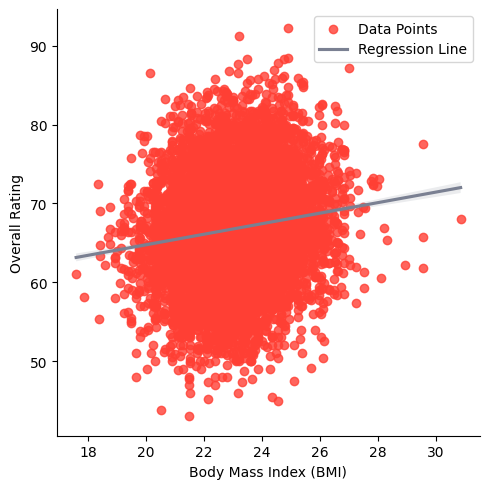

In [ ]:
#  Plotting a scatter plot to show the relationship between the Body Mass Index (BMI) and the overall ratings of the players.

sns.lmplot(x="BMI", y="Overall_Rating", data=player_attributes, scatter_kws={"color": "#ff3f34"}, line_kws={"color": "#7a8092"})
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Overall Rating")
plt.legend(["Data Points", "Regression Line"])
plt.show()

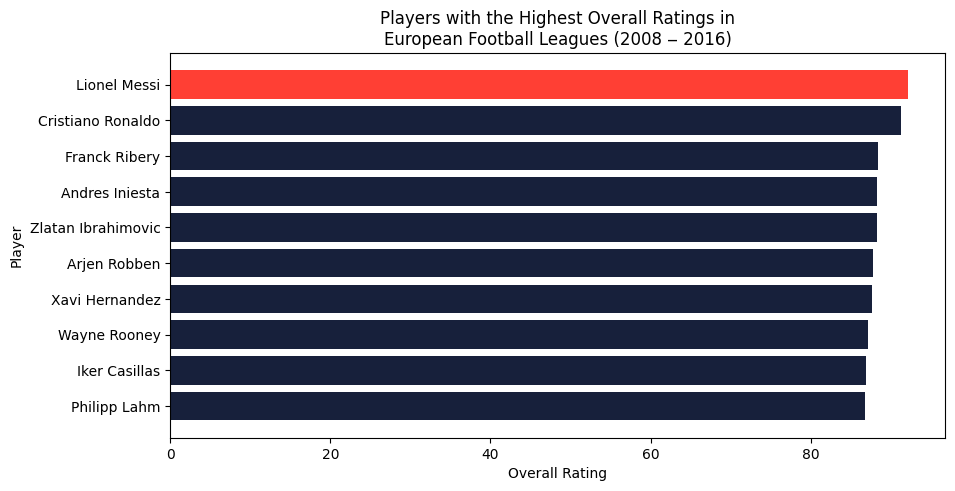

In [ ]:
player_attributes=player_attributes.sort_values(by="Overall_Rating", ascending=False).reset_index(drop=True)    #   Sorting the players in descending order of their overall ratings.


#   Plotting a horizontal bar graph to show the top ten players with the highest overall ratings.

plt.figure(figsize=(10, 5))
plt.barh(player_attributes["Player"][:10], player_attributes["Overall_Rating"][:10], color="#17203b")
plt.barh(player_attributes["Player"][0], player_attributes["Overall_Rating"][0], color="#ff3f34")
plt.title('''Players with the Highest Overall Ratings in
European Football Leagues (2008 ‒ 2016)''')
plt.xlabel("Overall Rating")
plt.ylabel("Player")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
player_attributes[:20]

,Player,Weight,Height,Overall_Rating,Potential,Crossing,Finishing,Head_Accuracy,Short_Passing,Volleys,...,Penalties,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeper_Diving,Goalkeeper_Handling,Goalkeeper_Kicking,Goalkeeper_Positioning,Goalkeeper_Reflexes,BMI
0,Lionel Messi,72.121128,1.7018,92.192308,95.230769,83.346154,92.230769,69.269231,88.807692,87.538462,...,80.153846,18.769231,21.846154,20.115385,6.461538,12.653846,29.461538,15.076923,10.615385,24.902645
1,Cristiano Ronaldo,79.832192,1.8542,91.280000,93.480000,83.880000,91.120000,85.520000,82.280000,85.560000,...,83.600000,22.120000,30.840000,23.000000,7.480000,12.960000,28.440000,15.160000,12.760000,23.220144
2,Fabio Cannavaro,74.842680,1.7526,85.166667,90.833333,42.000000,20.333333,88.500000,74.000000,NaN,...,84.833333,90.666667,87.500000,NaN,5.000000,18.500000,65.500000,18.333333,19.333333,24.365971
3,Neymar,68.038800,1.7526,83.800000,90.760000,70.320000,83.480000,63.320000,75.680000,81.240000,...,79.760000,21.000000,26.960000,33.000000,8.760000,10.560000,20.400000,15.840000,12.320000,22.150882
4,Andres Iniesta,68.038800,1.7018,88.320000,90.560000,83.720000,72.680000,55.320000,93.880000,74.000000,...,71.120000,58.240000,59.680000,56.000000,6.760000,14.720000,26.040000,14.520000,10.000000,23.493061
5,Mario Goetze,72.121128,1.7526,83.176471,90.147059,72.529412,75.794118,53.470588,84.970588,78.617647,...,66.705882,20.617647,30.558824,28.000000,13.294118,7.882353,14.647059,6.941176,10.705882,23.479935
6,Zlatan Ibrahimovic,94.800728,1.9558,88.285714,90.047619,72.380952,90.000000,79.714286,84.238095,90.047619,...,88.000000,20.904762,43.809524,26.809524,12.666667,17.142857,24.714286,13.238095,15.142857,24.783509
7,Roy Makaay,74.842680,1.8796,78.333333,90.000000,62.333333,84.166667,81.666667,66.333333,NaN,...,88.166667,21.166667,28.666667,NaN,4.000000,20.333333,37.666667,20.833333,20.166667,21.184512
8,James Rodriguez,74.842680,1.8034,83.000000,89.954545,81.272727,78.045455,67.136364,81.636364,77.409091,...,80.590909,30.227273,39.318182,33.636364,15.000000,15.000000,15.000000,5.000000,14.000000,23.012574
9,Franck Ribery,72.121128,1.7018,88.458333,89.916667,85.166667,77.750000,48.541667,87.791667,82.041667,...,81.500000,18.708333,25.083333,26.000000,13.333333,8.541667,22.833333,9.500000,11.708333,24.902645


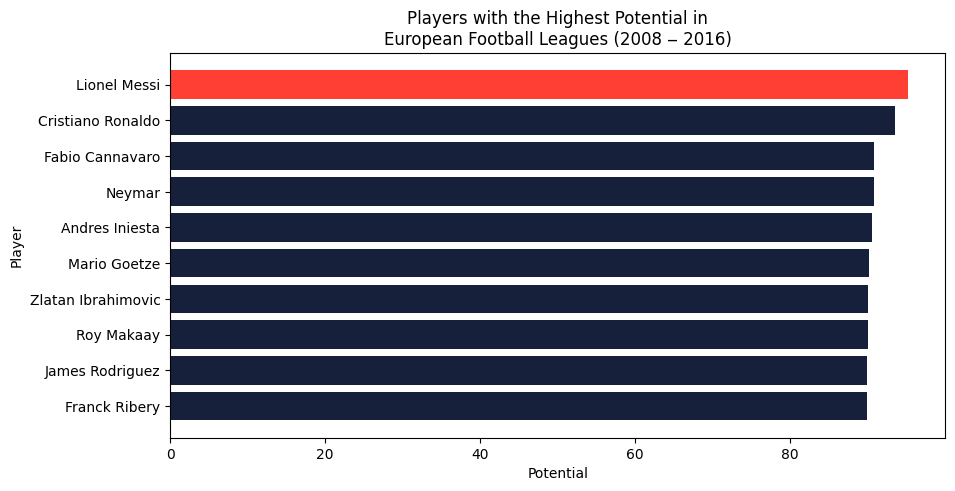

In [ ]:
player_attributes=player_attributes.sort_values(by="Potential", ascending=False).reset_index(drop=True)    #   Sorting the players in descending order of their overall ratings.


#   Plotting a horizontal bar graph to show the top ten players with the highest overall ratings.

plt.figure(figsize=(10, 5))
plt.barh(player_attributes["Player"][:10], player_attributes["Potential"][:10], color="#17203b")
plt.barh(player_attributes["Player"][0], player_attributes["Potential"][0], color="#ff3f34")
plt.title('''Players with the Highest Potential in
European Football Leagues (2008 ‒ 2016)''')
plt.xlabel("Potential")
plt.ylabel("Player")
plt.gca().invert_yaxis()
plt.show()

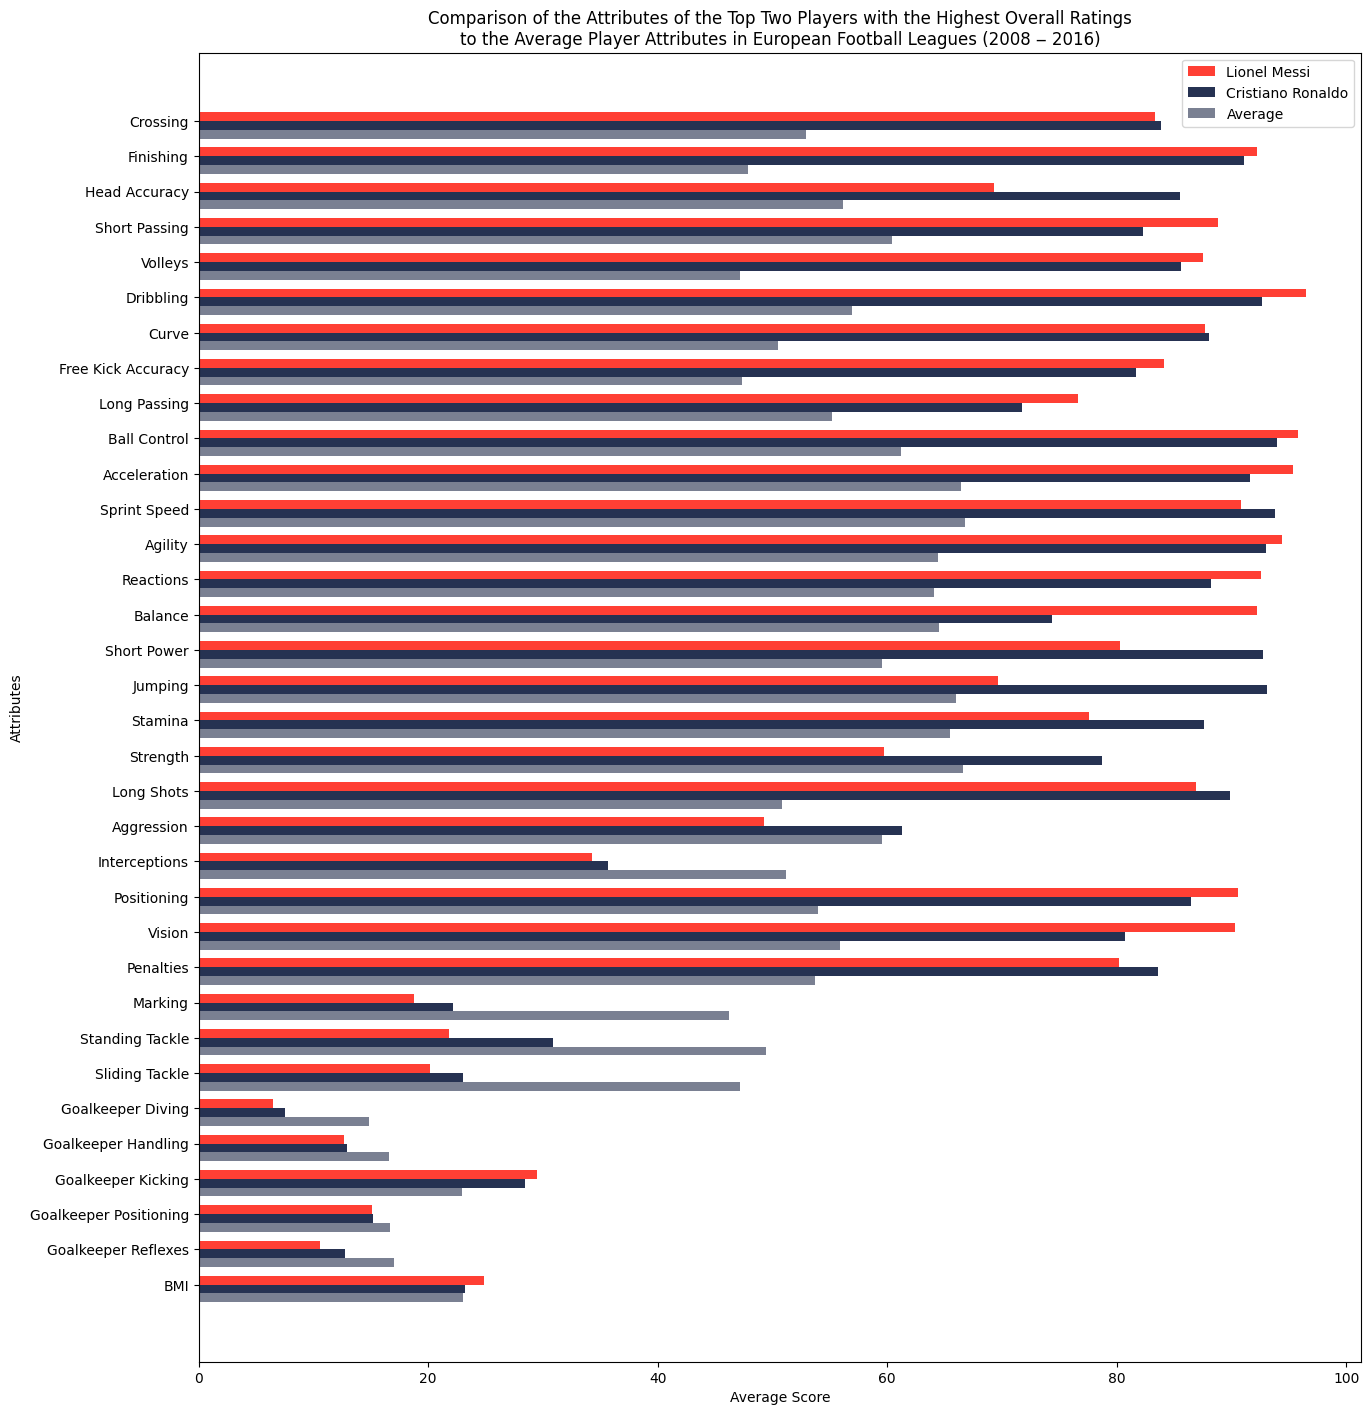

In [ ]:
top_players=player_attributes["Player"][:2].tolist()    #   Storing the names of the top two players with the highest overall ratings in a list.
top_player_attributes=player_attributes[player_attributes["Player"].isin(top_players)]  #   Filtering the pandas.DataFrame to include only the top two players with the highest overall ratings.
top_player_attributes=top_player_attributes.transpose().reset_index()   #   Transposing the pandas.DataFrame.
top_player_attributes.columns=top_player_attributes.iloc[0] #   Setting the first row as the column names.
top_player_attributes=top_player_attributes.drop([0, 1, 2, 3, 4]).reset_index(drop=True)  #   Dropping the unnecessary rows.
top_player_attributes=top_player_attributes.rename(columns={"Player": "Attributes"})    #   Renaming the first column.
average_attributes=player_attributes.mean().reset_index()   #   Calculating the average of all the attributes for all the players, and storing it in a pandas.DataFrame.
average_attributes.columns=["Attributes", "Average"]    #   Setting the column names.
average_attributes=average_attributes.drop([0, 1, 2, 3]).reset_index(drop=True)  #   Dropping the unnecessary rows.
top_player_attributes["Attributes"]=top_player_attributes["Attributes"].apply(lambda x: x.replace("_", " "))    #   Replacing the underscores in the column values with spaces.

#   Plotting a horizontal bar graph to compare the attributes of the top two players with the highest overall ratings.

figure=plt.figure(figsize=(15, 17))
axis=figure.add_subplot()
width=np.arange(len(top_player_attributes["Attributes"]))
plt.barh(width-0.25, top_player_attributes.iloc[:, 1], color="#ff3f34", height=0.25, label="Lionel Messi", align="edge")
plt.barh(width, top_player_attributes.iloc[:, 2], color="#263252", height=0.25, label="Cristiano Ronaldo", align="edge")
plt.barh(width+0.25, average_attributes["Average"], color="#7a8092", height=0.25, label="Average", align="edge")
axis.set_yticks(width)
axis.set_yticklabels(top_player_attributes["Attributes"])
plt.title('''Comparison of the Attributes of the Top Two Players with the Highest Overall Ratings
to the Average Player Attributes in European Football Leagues (2008 ‒ 2016)''')
plt.xlabel("Average Score")
plt.ylabel("Attributes")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [ ]:
messi_attributes=top_player_attributes.drop(["Cristiano Ronaldo"], axis=1)  #   Creating a new pandas.DataFrame to store the attributes of the specific player.
messi_attributes=messi_attributes.sort_values(by="Lionel Messi", ascending=False).reset_index(drop=True)    #   Sorting the specific player attributes in descending order.
messi_attributes=messi_attributes.iloc[:-18, : ]    #   Dropping the last few rows, as they are either unnecessary or redundant.
messi_attributes

,Attributes,Lionel Messi
0,Dribbling,96.461538
1,Ball Control,95.769231
2,Acceleration,95.307692
3,Agility,94.384615
4,Reactions,92.538462
5,Balance,92.230769
6,Finishing,92.230769
7,Sprint Speed,90.846154
8,Positioning,90.538462
9,Vision,90.269231


In [ ]:
average_attributes["Attributes"]=average_attributes["Attributes"].apply(lambda x: x.replace("_", " "))  #   Replacing the underscores in the column values with spaces.
messi_attributes=messi_attributes.merge(average_attributes, on="Attributes")    #   Merging both the pandas.DataFrames into one.
messi_attributes

,Attributes,Lionel Messi,Average
0,Dribbling,96.461538,56.922923
1,Ball Control,95.769231,61.174821
2,Acceleration,95.307692,66.414245
3,Agility,94.384615,64.425084
4,Reactions,92.538462,64.048981
5,Balance,92.230769,64.494772
6,Finishing,92.230769,47.880555
7,Sprint Speed,90.846154,66.806224
8,Positioning,90.538462,53.956360
9,Vision,90.269231,55.897250


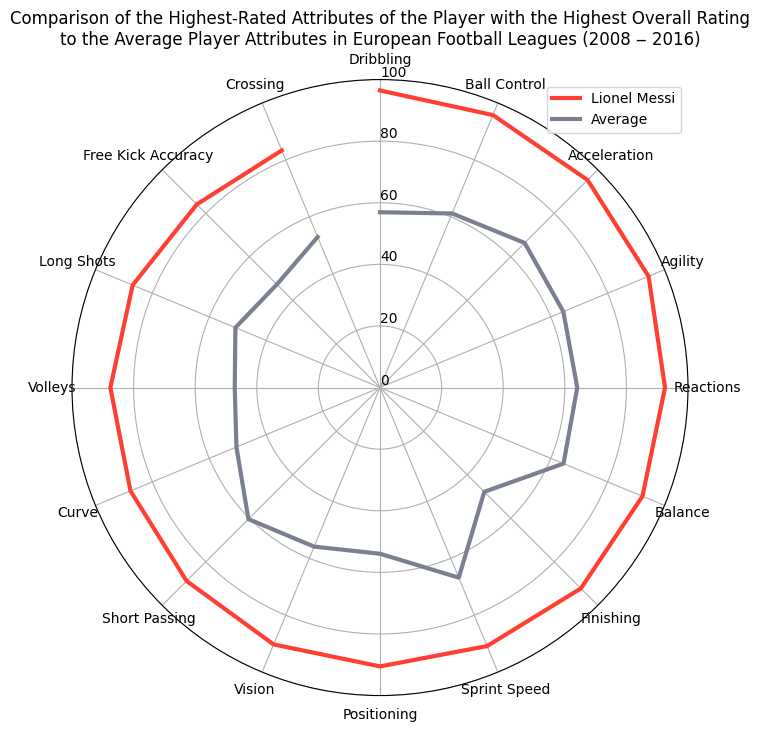

In [ ]:
#   Plotting a polar chart to compare the highest-rated attributes of the player with the highest overall rating to the average player attributes.

figure=plt.figure(figsize=(8, 8))
axis=figure.add_subplot(projection="polar")
axis.set_theta_zero_location("N")
axis.set_theta_direction(-1)
axis.set_rlabel_position(0)
axis.set_yticks([0, 20, 40, 60, 80, 100])
axis.set_yticklabels(["0", "20", "40", "60", "80", "100"])
axis.set_ylim(0, 100)
axis.set_xticks(np.arange(0, 2*np.pi, np.pi/8))
axis.set_xticklabels(messi_attributes["Attributes"], rotation=90)
axis.plot(np.arange(0, 2*np.pi, np.pi/8), messi_attributes.iloc[:, 1], color="#ff3f34", label="Lionel Messi", linewidth=3)
axis.plot(np.arange(0, 2*np.pi, np.pi/8), messi_attributes.iloc[:, 2], color="#7a8092", label="Average", linewidth=3)
plt.title('''Comparison of the Highest-Rated Attributes of the Player with the Highest Overall Rating
to the Average Player Attributes in European Football Leagues (2008 ‒ 2016)''')
plt.legend()
plt.show()

In [ ]:
team_attributes=team_attributes.groupby("Team").mean().reset_index()    #   Grouping the pandas.DataFrame by the teams and taking the mean of the attributes.
wins=dataframe.groupby(["Team", "League"])["Wins"].sum().reset_index()  #   Grouping the pandas.DataFrame by the teams and leagues, and summing the goals scored.
wins=wins.sort_values(by="Wins", ascending=False).reset_index(drop=True)    #   Sorting the pandas.DataFrame by the goals scored in descending order.
team_attributes_wins=pd.merge(team_attributes, wins, on="Team")    #   Merging both the pandas.DataFrames on the basis of the teams.
team_attributes_wins=team_attributes_wins.sort_values(by="Wins", ascending=False) #   Sorting the pandas.DataFrame by the goals scored in descending order.
team_attributes_wins=team_attributes_wins.reset_index(drop=True)
team_attributes_wins=team_attributes_wins.drop(["id", "team_fifa_api_id", "team_api_id", "League"], axis=1)   #   Dropping the unnecessary columns.
team_attributes_wins[:10]

,Team,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,Wins
0,FC Barcelona,35.833333,35.0,34.000000,45.166667,33.333333,53.000000,64.333333,54.500000,66.500000,234
1,Real Madrid CF,50.666667,55.5,38.666667,67.500000,53.833333,69.000000,52.000000,52.166667,63.500000,228
2,Celtic,61.333333,50.5,57.333333,55.666667,60.833333,60.833333,53.333333,54.333333,62.166667,218
3,FC Bayern Munich,48.666667,29.0,35.166667,38.500000,40.666667,49.666667,57.166667,48.833333,55.166667,193
4,Manchester United,51.833333,38.0,45.833333,50.000000,63.166667,53.833333,45.000000,48.000000,54.833333,192
5,Juventus,45.833333,41.0,32.833333,56.666667,60.500000,65.666667,44.000000,57.333333,41.166667,189
6,SL Benfica,59.000000,55.0,45.500000,63.833333,59.000000,55.333333,54.333333,51.500000,52.000000,185
7,FC Porto,51.000000,50.0,48.666667,55.666667,66.833333,66.166667,53.333333,50.333333,55.333333,183
8,Ajax,35.166667,41.5,33.833333,50.666667,58.500000,49.666667,59.833333,53.833333,54.333333,181
9,FC Basel,55.000000,63.0,44.833333,60.833333,63.833333,52.500000,47.666667,57.500000,54.500000,180


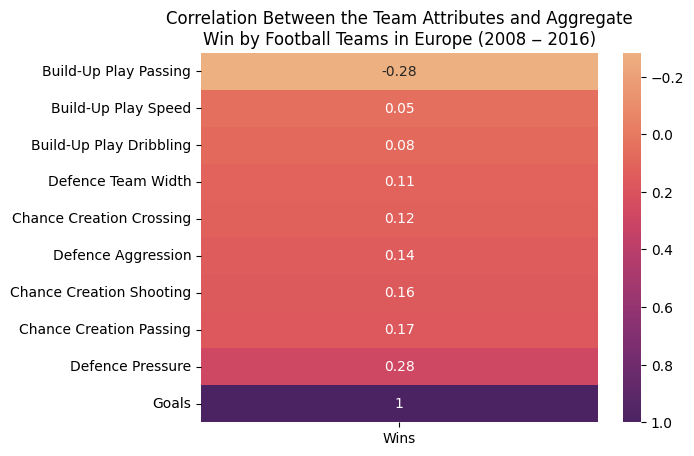

In [ ]:
sns.heatmap(team_attributes_wins.corr()[["Wins"]].sort_values(by="Wins", ascending=True), annot=True, cmap="flare", yticklabels=["Build-Up Play Passing", "Build-Up Play Speed", "Build-Up Play Dribbling", "Defence Team Width", "Chance Creation Crossing", "Defence Aggression", "Chance Creation Shooting", "Chance Creation Passing", "Defence Pressure", "Goals"])
plt.title('''Correlation Between the Team Attributes and Aggregate
Win by Football Teams in Europe (2008 ‒ 2016)''')
plt.gcf().axes[1].invert_yaxis()
plt.show()

In [ ]:
player_attributes=player_attributes.sort_values(by="Overall_Rating", ascending=False).reset_index(drop=True)    #   Sorting the players in descending order of their overall ratings.


In [ ]:
player_attributes[:30]

,Player,Weight,Height,Overall_Rating,Potential,Crossing,Finishing,Head_Accuracy,Short_Passing,Volleys,...,Penalties,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeper_Diving,Goalkeeper_Handling,Goalkeeper_Kicking,Goalkeeper_Positioning,Goalkeeper_Reflexes,BMI
0,Lionel Messi,72.121128,1.7018,92.192308,95.230769,83.346154,92.230769,69.269231,88.807692,87.538462,...,80.153846,18.769231,21.846154,20.115385,6.461538,12.653846,29.461538,15.076923,10.615385,24.902645
1,Cristiano Ronaldo,79.832192,1.8542,91.280000,93.480000,83.880000,91.120000,85.520000,82.280000,85.560000,...,83.600000,22.120000,30.840000,23.000000,7.480000,12.960000,28.440000,15.160000,12.760000,23.220144
2,Fabio Cannavaro,74.842680,1.7526,85.166667,90.833333,42.000000,20.333333,88.500000,74.000000,NaN,...,84.833333,90.666667,87.500000,NaN,5.000000,18.500000,65.500000,18.333333,19.333333,24.365971
3,Neymar,68.038800,1.7526,83.800000,90.760000,70.320000,83.480000,63.320000,75.680000,81.240000,...,79.760000,21.000000,26.960000,33.000000,8.760000,10.560000,20.400000,15.840000,12.320000,22.150882
4,Andres Iniesta,68.038800,1.7018,88.320000,90.560000,83.720000,72.680000,55.320000,93.880000,74.000000,...,71.120000,58.240000,59.680000,56.000000,6.760000,14.720000,26.040000,14.520000,10.000000,23.493061
5,Mario Goetze,72.121128,1.7526,83.176471,90.147059,72.529412,75.794118,53.470588,84.970588,78.617647,...,66.705882,20.617647,30.558824,28.000000,13.294118,7.882353,14.647059,6.941176,10.705882,23.479935
6,Zlatan Ibrahimovic,94.800728,1.9558,88.285714,90.047619,72.380952,90.000000,79.714286,84.238095,90.047619,...,88.000000,20.904762,43.809524,26.809524,12.666667,17.142857,24.714286,13.238095,15.142857,24.783509
7,Roy Makaay,74.842680,1.8796,78.333333,90.000000,62.333333,84.166667,81.666667,66.333333,NaN,...,88.166667,21.166667,28.666667,NaN,4.000000,20.333333,37.666667,20.833333,20.166667,21.184512
8,James Rodriguez,74.842680,1.8034,83.000000,89.954545,81.272727,78.045455,67.136364,81.636364,77.409091,...,80.590909,30.227273,39.318182,33.636364,15.000000,15.000000,15.000000,5.000000,14.000000,23.012574
9,Franck Ribery,72.121128,1.7018,88.458333,89.916667,85.166667,77.750000,48.541667,87.791667,82.041667,...,81.500000,18.708333,25.083333,26.000000,13.333333,8.541667,22.833333,9.500000,11.708333,24.902645


In [ ]:
player_attributes=player_attributes.sort_values(by="Potential", ascending=False).reset_index(drop=True)    #   Sorting the players in descending order of their overall ratings.
player_attributes[:30]

In [ ]:
ronaldo_attributes=top_player_attributes.drop(["Lionel Messi"], axis=1)  #   Creating a new pandas.DataFrame to store the attributes of the specific player.
ronaldo_attributes=ronaldo_attributes.sort_values(by="Cristiano Ronaldo", ascending=False).reset_index(drop=True)    #   Sorting the specific player attributes in descending order.
ronaldo_attributes=ronaldo_attributes.iloc[:-18, : ]    #   Dropping the last few rows, as they are either unnecessary or redundant.
ronaldo_attributes

,Attributes,Cristiano Ronaldo
0,Ball Control,93.96
1,Sprint Speed,93.76
2,Jumping,93.04
3,Agility,92.96
4,Short Power,92.76
5,Dribbling,92.64
6,Acceleration,91.64
7,Finishing,91.12
8,Long Shots,89.88
9,Reactions,88.16


In [ ]:
average_attributes["Attributes"]=average_attributes["Attributes"].apply(lambda x: x.replace("_", " "))  #   Replacing the underscores in the column values with spaces.
ronaldo_attributes=ronaldo_attributes.merge(average_attributes, on="Attributes")    #   Merging both the pandas.DataFrames into one.
ronaldo_attributes

,Attributes,Cristiano Ronaldo,Average
0,Ball Control,93.96,61.174821
1,Sprint Speed,93.76,66.806224
2,Jumping,93.04,66.026849
3,Agility,92.96,64.425084
4,Short Power,92.76,59.494515
5,Dribbling,92.64,56.922923
6,Acceleration,91.64,66.414245
7,Finishing,91.12,47.880555
8,Long Shots,89.88,50.818879
9,Reactions,88.16,64.048981


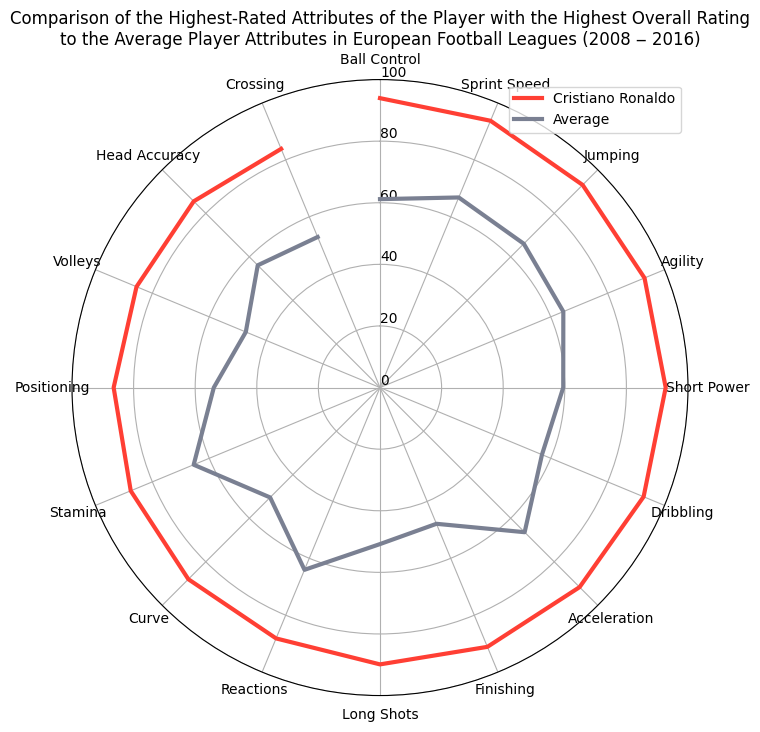

In [ ]:
#   Plotting a polar chart to compare the highest-rated attributes of the player with the highest overall rating to the average player attributes.
figure=plt.figure(figsize=(8, 8))
axis=figure.add_subplot(projection="polar")
axis.set_theta_zero_location("N")
axis.set_theta_direction(-1)
axis.set_rlabel_position(0)
axis.set_yticks([0, 20, 40, 60, 80, 100])
axis.set_yticklabels(["0", "20", "40", "60", "80", "100"])
axis.set_ylim(0, 100)
axis.set_xticks(np.arange(0, 2*np.pi, np.pi/8))
axis.set_xticklabels(ronaldo_attributes["Attributes"], rotation=90)
axis.plot(np.arange(0, 2*np.pi, np.pi/8), ronaldo_attributes.iloc[:, 1], color="#ff3f34", label="Cristiano Ronaldo", linewidth=3)
axis.plot(np.arange(0, 2*np.pi, np.pi/8), ronaldo_attributes.iloc[:, 2], color="#7a8092", label="Average", linewidth=3)
plt.title('''Comparison of the Highest-Rated Attributes of the Player with the Highest Overall Rating
to the Average Player Attributes in European Football Leagues (2008 ‒ 2016)''')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Number of top 30 best players in team')

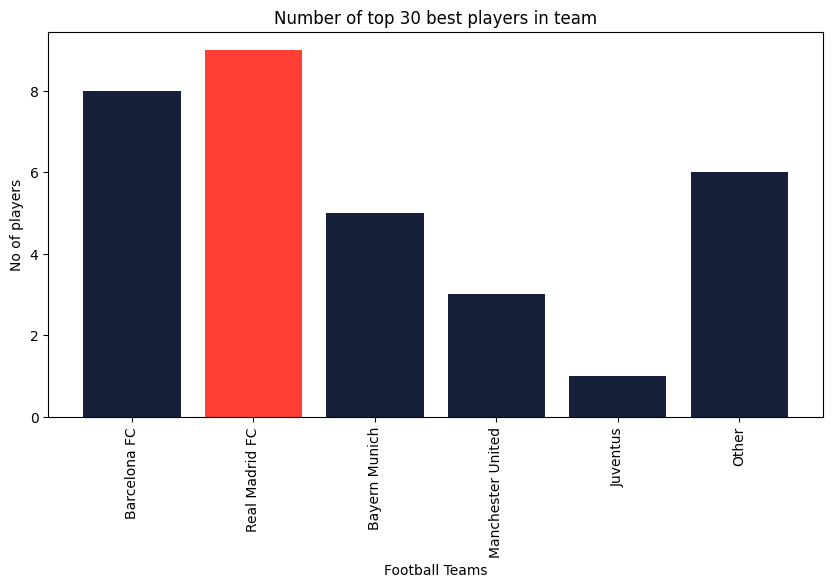

In [ ]:
name = ['Barcelona FC', 'Real Madrid FC', 'Bayern Munich', 'Manchester United', 'Juventus', 'Other']
num = [8,9,5,3,1,6]
plt.figure(figsize=(10, 5))
plt.bar(name, num, color="#17203b")
plt.bar(name[1], num[1], color="#ff3f34")
plt.xticks(rotation=90)
plt.xlabel("Football Teams")
plt.ylabel("No of players")
plt.title("Number of top 30 best players in team")

In [ ]:
connection.close()  #   Closing the connection to the database.